In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def decode_eventid(eventid):
    """
    assume encoding from fuel_up_nukecc.py, etc.
    """
    eventid = str(eventid)
    phys_evt = eventid[-2:]
    eventid = eventid[:-2]
    gate = eventid[-4:]
    eventid = eventid[:-4]
    subrun = eventid[-4:]
    eventid = eventid[:-4]
    run = eventid
    return (run, subrun, gate, phys_evt)

In [3]:
f = h5py.File('minosmatch_nukecczdefs_genallz_pcodecap66_127x50x25_xuv_minerva1mc.hdf5', 'r')

In [4]:
len(f['eventids'][:])

2200333

In [5]:
runnums = [int(decode_eventid(eid)[0]) for eid in f['eventids'][:]]

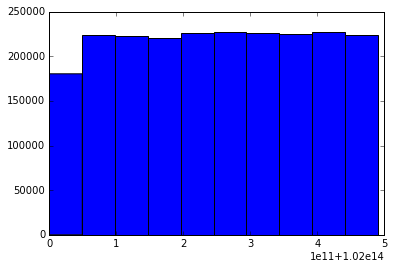

In [6]:
n, bins, patches = plt.hist(f['eventids'])

In [7]:
runnums[:10]

[10200, 10200, 10200, 10200, 10200, 10200, 10200, 10200, 10200, 10200]

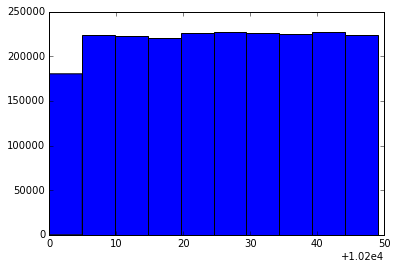

In [8]:
n, bins, patches = plt.hist(runnums)

In [9]:
any(np.array(runnums) == 112205)

False

In [10]:
for name in f:
    print name

eventids
hits-u
hits-v
hits-x
planecodes
segments
zs


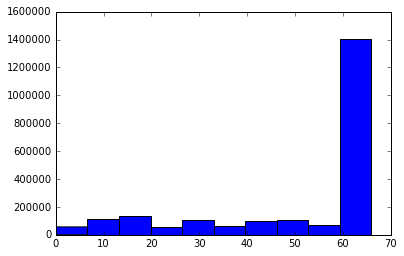

In [11]:
n, bins, patches = plt.hist(f['planecodes'])

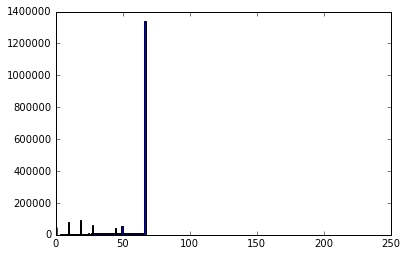

In [12]:
_, _, _ = plt.hist(f['planecodes'], bins=214, range=(0, 214))

In [13]:
import plane_codes

In [14]:
plane_codes.build_reversed_indexed_codes()

{0: (-999, -999, -999),
 1: (-5, 1, 0),
 2: (-5, 2, 0),
 3: (-4, 1, 0),
 4: (-4, 2, 0),
 5: (-3, 1, 0),
 6: (-3, 2, 0),
 7: (-2, 1, 0),
 8: (-2, 2, 0),
 9: (-1, 0, 1),
 10: (0, 1, 0),
 11: (0, 2, 0),
 12: (1, 1, 0),
 13: (1, 2, 0),
 14: (2, 1, 0),
 15: (2, 2, 0),
 16: (3, 1, 0),
 17: (3, 2, 0),
 18: (4, 0, 2),
 19: (5, 1, 0),
 20: (5, 2, 0),
 21: (6, 1, 0),
 22: (6, 2, 0),
 23: (7, 1, 0),
 24: (7, 2, 0),
 25: (8, 1, 0),
 26: (8, 2, 0),
 27: (9, 0, 3),
 28: (11, 1, 0),
 29: (11, 2, 0),
 30: (12, 1, 0),
 31: (12, 2, 0),
 32: (13, 1, 0),
 33: (13, 2, 0),
 34: (14, 1, 0),
 35: (14, 2, 0),
 36: (15, 1, 0),
 37: (15, 2, 0),
 38: (16, 1, 0),
 39: (16, 2, 0),
 40: (17, 1, 0),
 41: (17, 2, 0),
 42: (18, 1, 0),
 43: (18, 2, 0),
 44: (19, 0, 4),
 45: (20, 1, 0),
 46: (20, 2, 0),
 47: (21, 1, 0),
 48: (21, 2, 0),
 49: (22, 0, 5),
 50: (23, 1, 0),
 51: (23, 2, 0),
 52: (24, 1, 0),
 53: (24, 2, 0),
 54: (25, 1, 0),
 55: (25, 2, 0),
 56: (26, 1, 0),
 57: (26, 2, 0),
 58: (27, 1, 0),
 59: (27, 2, 0),


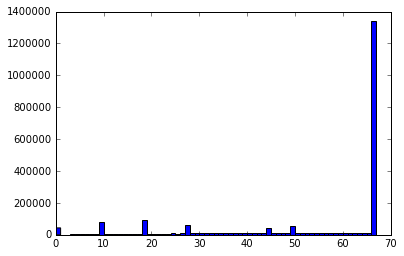

In [15]:
n, bins, patches = plt.hist(f['planecodes'], bins=np.arange(71))

In [16]:
planes = np.zeros(np.shape(f['planecodes']))
f['planecodes'].read_direct(planes)

(array([   43282.,     1707.,     1721.,     1905.,     2329.,     2805.,
            2962.,     2999.,     3605.,    78083.,     7410.,     7520.,
            7673.,     7758.,     7644.,     7836.,     7832.,     8014.,
           93959.,     7983.,     7934.,     8044.,     8032.,     8034.,
            8261.,     8080.,     8299.,    62399.,     8412.,     8463.,
            8345.,     8558.,     8371.,     8492.,     8534.,     8718.,
            8924.,     9061.,     9051.,     9095.,     9117.,     9193.,
            9018.,     9321.,    42783.,     9205.,     9372.,     9296.,
            9362.,    57163.,     9558.,     9702.,     9598.,     9608.,
            9352.,     9785.,     9857.,     9800.,     9840.,     9709.,
            9907.,     9910.,    10081.,    10053.,    10017.,    10190.,
         1341402.,        0.,        0.,        0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 

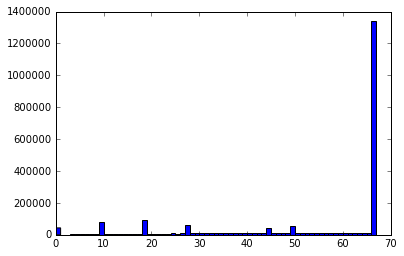

In [17]:
plt.hist(planes[planes < 70], bins=np.arange(71))  # last bins are `[67, 68), [68, 69), [69, 70)`

65
66


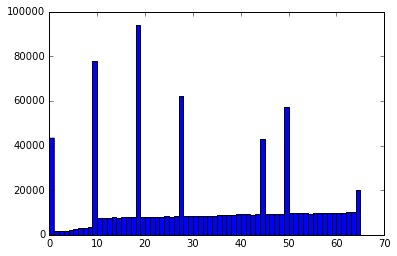

In [18]:
n, bins, _ = plt.hist(planes[planes < 66], bins=np.arange(66))
print len(n)
print len(bins)

In [19]:
print any(planes == 67)

False


In [20]:
print any(planes > 66)

False


In [21]:
print any(planes < 0)

False


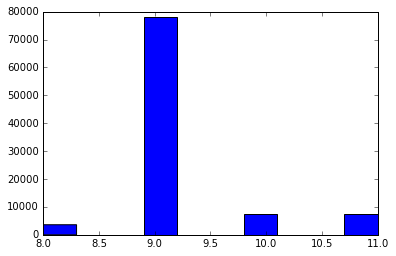

In [22]:
a = np.where(planes >= 8)
b = np.where(planes <= 11)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt1 == 9

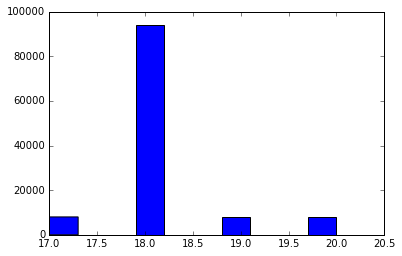

In [23]:
a = np.where(planes >= 17)
b = np.where(planes <= 20)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt2 == 18

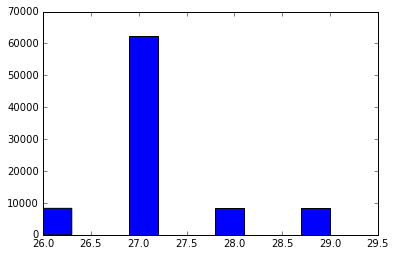

In [24]:
a = np.where(planes >= 26)
b = np.where(planes <= 29)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt3 == 27

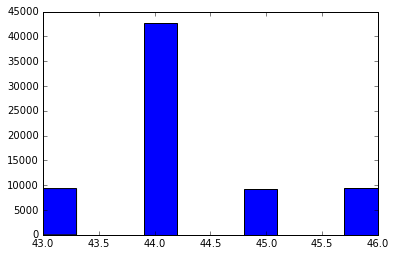

In [25]:
a = np.where(planes >= 43)
b = np.where(planes <= 46)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt4 == 44

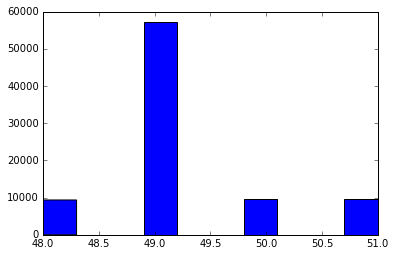

In [26]:
a = np.where(planes >= 48)
b = np.where(planes <= 51)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt5 == 49

In [27]:
segments = np.zeros(np.shape(f['segments']))
f['segments'].read_direct(segments)

(array([   16734.,    96106.,   116974.,    97047.,    69707.,    90932.,
           39640.,    41354.,   115593.,    10264.,  1505982.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

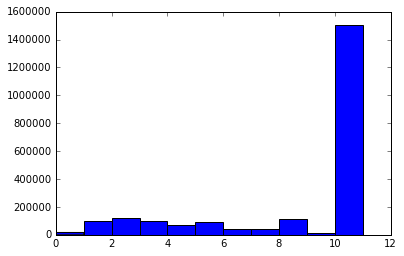

In [28]:
plt.hist(segments, bins=np.arange(12))

In [29]:
print np.min(planes)
print np.max(planes)

0.0
66.0
